<a href="https://colab.research.google.com/github/ming-zhao/Intro-to-Deep-Learning/blob/master/Linear%20Models/03_Bias_Variance_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from DesignMat import Polynomial, Gaussian, Sigmoidal
from Regressor import LeastSquares

np.random.seed(1234)

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

def create_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(*domain, sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

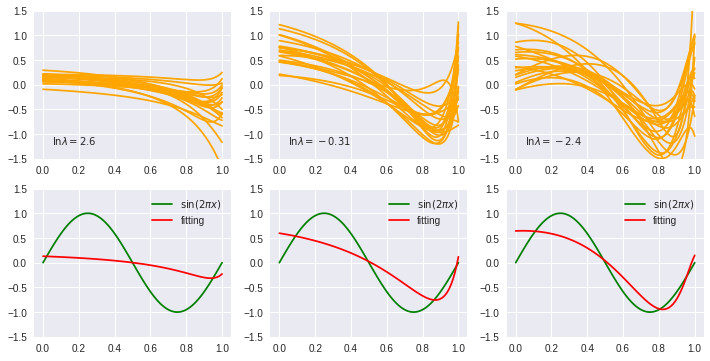

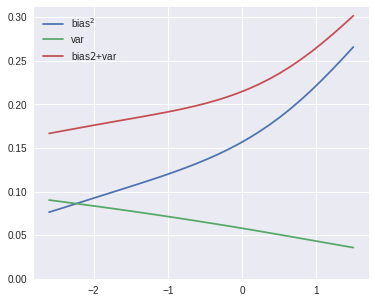

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

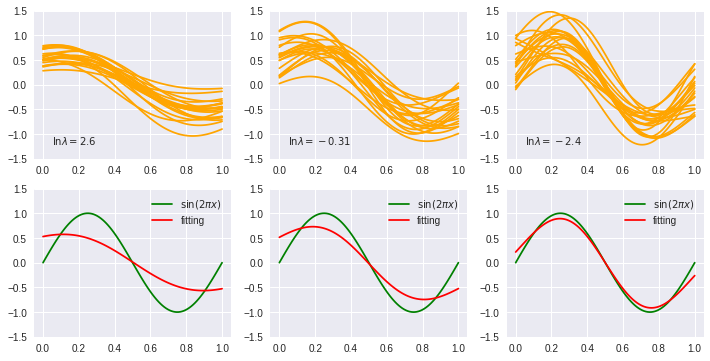

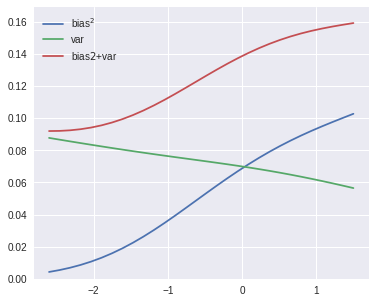

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

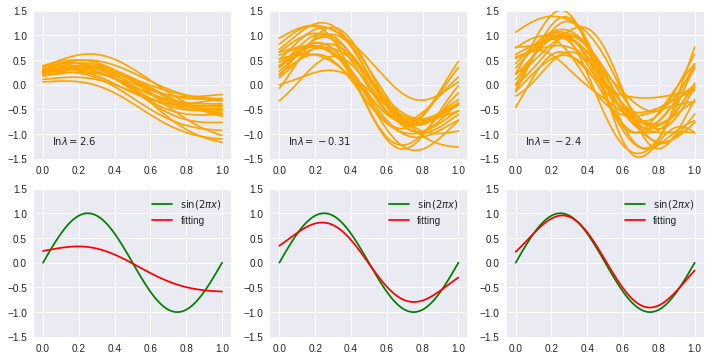

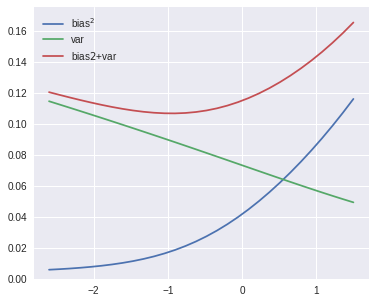

<IPython.core.display.Javascript object>

In [2]:
funcs = {'Polynomial': [24], 'Gaussian': [np.linspace(0, 1, 24), 0.1], 'Sigmoidal': [np.linspace(0, 1, 24), 10]}

x_test = np.linspace(0, 1, 100)
t_test = sinusoidal(x_test)

# from ipywidgets import interact, widgets
# widget_layout = widgets.Layout(width='250px', height='30px')
# @interact(fname = widgets.Dropdown(description='Basis Functions:',
#                                    style = {'description_width': 'initial'},
#                                    options=['Polynomial','Gaussian','Sigmoidal'],
#                                    value='Gaussian',layout=widget_layout))

def bias_and_var(fname):
    phi_test = globals()[fname](*funcs[fname]).dm(x_test)
    plt.figure(figsize=(12, 6))
    
    for loc, alpha in enumerate([2.6, -0.31, -2.4]):
        plt.subplot(2, 3, loc+1)
        # We have 100 data sets, each having 25 data points
        x_train, t_train = zip(*[create_data(sinusoidal, 25, 0.8) for i in range(100)])
        phi_train = [globals()[fname](*funcs[fname]).dm(x) for x in x_train]
        
        # t[i] is an array contains the prediction values for x_test and 
        # the fitting function is derived based on i-th data set
        t = [LeastSquares(np.exp(alpha)).fit(phi, t).predict(phi_test) for phi, t in zip(phi_train, t_train)]
        # For clarity, only 20 of the 100 fits are shown
        for i in range(20):
            plt.plot(x_test, t[i], c="orange")
            
        plt.annotate(r"$\ln \lambda={}$".format(alpha), xy=(0.05, -1.2))        
        plt.ylim(-1.5, 1.5)

        plt.subplot(2, 3, loc+4)
        plt.plot(x_test, t_test, c="g", label="$\sin(2\pi x)$")
        plt.plot(x_test, np.asarray(t).mean(axis=0), c="r", label="fitting")
        plt.ylim(-1.5, 1.5)
        plt.legend()
    plt.show()
    
    plt.figure(figsize=(6, 5))
    x_train, t_train = zip(*[create_data(sinusoidal, 25, 0.8) for i in range(100)])
    phi_train = [globals()[fname](*funcs[fname]).dm(x) for x in x_train]
    alpha_range = np.linspace(-2.6, 1.5, 30)
    t = [[LeastSquares(np.exp(alpha)).fit(phi, t).predict(phi_test) for phi, t in zip(phi_train, t_train)]
         for alpha in alpha_range]
    
    bias2 = ((np.asarray(t).mean(axis=1) - t_test) ** 2).mean(axis=1) #(3.46)
    var = np.array(t).var(axis=1).mean(axis=1)                        #(3.47)
    
    plt.ylim(0, (bias2+var).max()+.01)
    plt.plot(alpha_range, bias2, label=r"bias$^2$")
    plt.plot(alpha_range, var, label="var")
    plt.plot(alpha_range, bias2+var, label=r"bias$2$+var")
    
    plt.legend()
    plt.show()

from google.colab import widgets
tb = widgets.TabBar(['Polynomial','Gaussian','Sigmoidal'], location='top')
for (p, value) in funcs.items():
  with tb.output_to(p):
    bias_and_var(p)